In [3]:
import numpy as np

# Data points (X)
X = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1],
    [4.5, 2.3], [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0],
    [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5], [1.0, 3.0],
    [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1],
    [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
])

# Initial centroids
centroids = np.array([[3.0, 3.0], [2.0, 2.0]])

def kmeans(X, centroids, max_iters=100, tol=1e-4):
    """
    Implements the KMeans clustering algorithm from scratch.

    Parameters:
    - X: Data points (numpy array)
    - centroids: Initial centroids (numpy array)
    - max_iters: Maximum number of iterations
    - tol: Convergence threshold

    Returns:
    - cluster_labels: Cluster assignments for each data point
    - centroids: Final centroids
    """
    k = len(centroids)  # Number of clusters
    for iteration in range(max_iters):
        print(f"Iteration {iteration + 1}:")
        
        # Assignment Step: Assign each point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        cluster_labels = np.argmin(distances, axis=1)
        
        # Update Step: Recalculate centroids
        new_centroids = np.array([
            X[cluster_labels == i].mean(axis=0) if np.any(cluster_labels == i) else centroids[i]
            for i in range(k)
        ])
        
        # Debug output
        print(f"Centroids after iteration {iteration + 1}: {new_centroids}")
        
        # Convergence Check
        if np.linalg.norm(new_centroids - centroids) < tol:
            print("Convergence reached.")
            break
        
        centroids = new_centroids

    return cluster_labels, centroids

# Run the KMeans algorithm
cluster_labels, final_centroids = kmeans(X, centroids)

# Output results
print("\nFinal Centroids:")
print(final_centroids)
print("\nCluster Assignments:")
print(cluster_labels)

Iteration 1:
Centroids after iteration 1: [[ 5.77058824  2.01764706]
 [ 4.0625     -0.1       ]]
Iteration 2:
Centroids after iteration 2: [[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]
Iteration 3:
Centroids after iteration 3: [[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]
Convergence reached.

Final Centroids:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]

Cluster Assignments:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0]


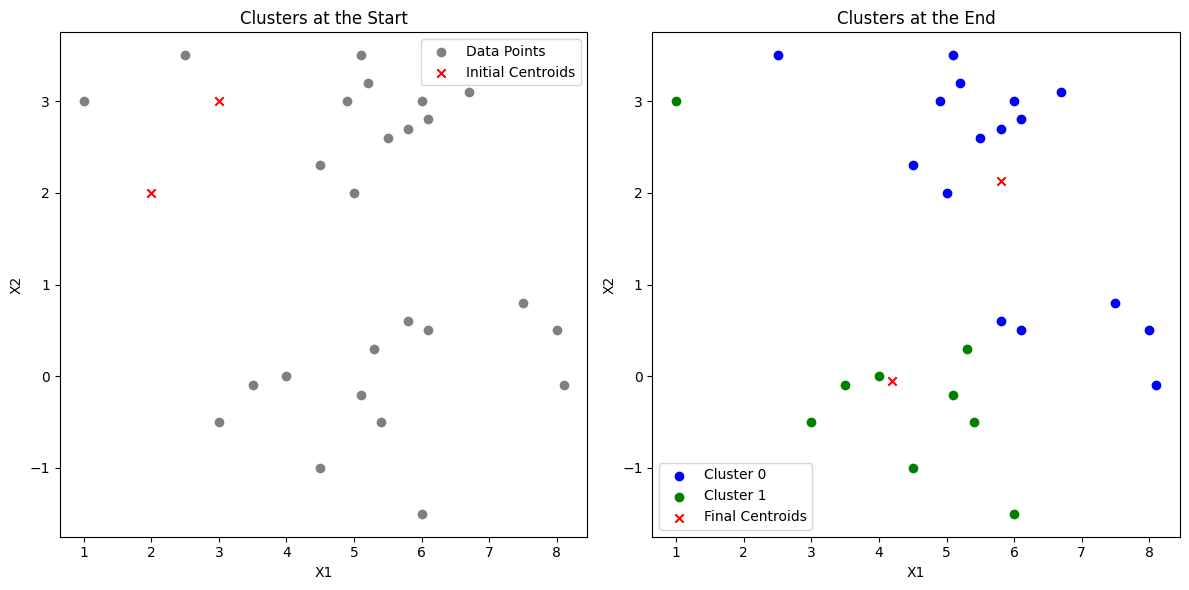

In [6]:
import matplotlib.pyplot as plt

# Initial centroids
initial_centroids = np.array([[3.0, 3.0], [2.0, 2.0]])

# Final centroids from the output
final_centroids = np.array([[5.8, 2.125], [4.2, -0.05555556]])

# Cluster assignments from the output
cluster_labels = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

# Separate points by their initial and final clusters
cluster_0 = X[cluster_labels == 0]
cluster_1 = X[cluster_labels == 1]

# Plot the clusters at the start
plt.figure(figsize=(12, 6))

# Subplot 1: Initial state
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='gray', label='Data Points')
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], color='red', label='Initial Centroids', marker='x')
plt.title('Clusters at the Start')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

# Subplot 2: Final state
plt.subplot(1, 2, 2)
plt.scatter(cluster_0[:, 0], cluster_0[:, 1], color='blue', label='Cluster 0')
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color='green', label='Cluster 1')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color='red', label='Final Centroids', marker='x')
plt.title('Clusters at the End')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

plt.tight_layout()
plt.show()

Iteration 1:
Centroids after iteration 1: [[ 5.3        -1.        ]
 [ 5.21363636  1.65909091]]
Iteration 2:
Centroids after iteration 2: [[ 4.98888889 -0.4       ]
 [ 5.35625     2.31875   ]]
Iteration 3:
Centroids after iteration 3: [[ 5.4        -0.16666667]
 [ 5.06153846  2.73076923]]
Iteration 4:
Centroids after iteration 4: [[ 5.56153846 -0.09230769]
 [ 4.85833333  2.89166667]]
Iteration 5:
Centroids after iteration 5: [[ 5.56153846 -0.09230769]
 [ 4.85833333  2.89166667]]
Convergence reached.


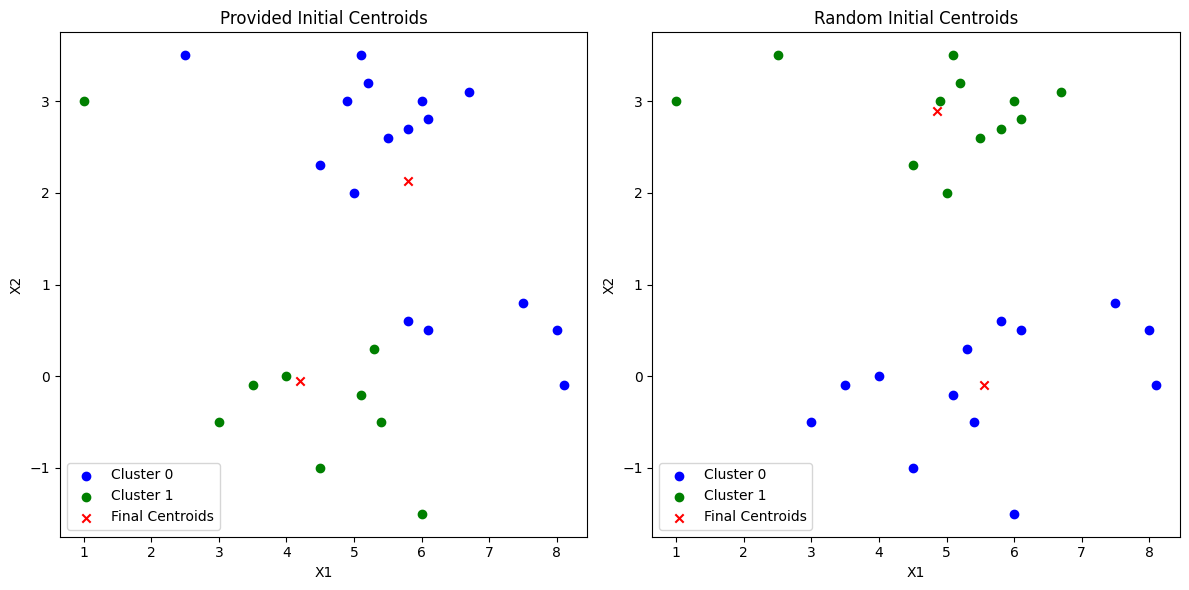

(array([[ 5.8       ,  2.125     ],
        [ 4.2       , -0.05555556]]),
 array([[ 5.56153846, -0.09230769],
        [ 4.85833333,  2.89166667]]))

In [7]:
import random

# Function to randomly initialize centroids
def random_initialize_centroids(X, k):
    return X[random.sample(range(len(X)), k)]

# Randomly initialize centroids
random_centroids = random_initialize_centroids(X, 2)

# Run KMeans with random initialization
random_cluster_labels, random_final_centroids = kmeans(X, random_centroids)

# Separate points by their new clusters (random initialization)
random_cluster_0 = X[random_cluster_labels == 0]
random_cluster_1 = X[random_cluster_labels == 1]

# Plot the comparison
plt.figure(figsize=(12, 6))

# Subplot 1: Results with provided initial centroids
plt.subplot(1, 2, 1)
plt.scatter(cluster_0[:, 0], cluster_0[:, 1], color='blue', label='Cluster 0')
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color='green', label='Cluster 1')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color='red', label='Final Centroids', marker='x')
plt.title('Provided Initial Centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

# Subplot 2: Results with random initial centroids
plt.subplot(1, 2, 2)
plt.scatter(random_cluster_0[:, 0], random_cluster_0[:, 1], color='blue', label='Cluster 0')
plt.scatter(random_cluster_1[:, 0], random_cluster_1[:, 1], color='green', label='Cluster 1')
plt.scatter(random_final_centroids[:, 0], random_final_centroids[:, 1], color='red', label='Final Centroids', marker='x')
plt.title('Random Initial Centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

plt.tight_layout()
plt.show()

# Display the final centroids for comparison
final_centroids_provided = final_centroids
final_centroids_random = random_final_centroids

(final_centroids_provided, final_centroids_random)

Iteration 1:
Centroids after iteration 1: [[5.224 1.34 ]]
Iteration 2:
Centroids after iteration 2: [[5.224 1.34 ]]
Convergence reached.
Iteration 1:
Centroids after iteration 1: [[ 5.21363636  1.65909091]
 [ 5.3        -1.        ]]
Iteration 2:
Centroids after iteration 2: [[ 5.35625     2.31875   ]
 [ 4.98888889 -0.4       ]]
Iteration 3:
Centroids after iteration 3: [[ 5.06153846  2.73076923]
 [ 5.4        -0.16666667]]
Iteration 4:
Centroids after iteration 4: [[ 4.85833333  2.89166667]
 [ 5.56153846 -0.09230769]]
Iteration 5:
Centroids after iteration 5: [[ 4.85833333  2.89166667]
 [ 5.56153846 -0.09230769]]
Convergence reached.
Iteration 1:
Centroids after iteration 1: [[ 5.73333333 -0.5       ]
 [ 5.64666667  2.27333333]
 [ 2.875       0.6       ]]
Iteration 2:
Centroids after iteration 2: [[ 6.18 -0.06]
 [ 5.48  2.82]
 [ 2.8   1.18]]
Iteration 3:
Centroids after iteration 3: [[ 6.18 -0.06]
 [ 5.48  2.82]
 [ 2.8   1.18]]
Convergence reached.
Iteration 1:
Centroids after iterati

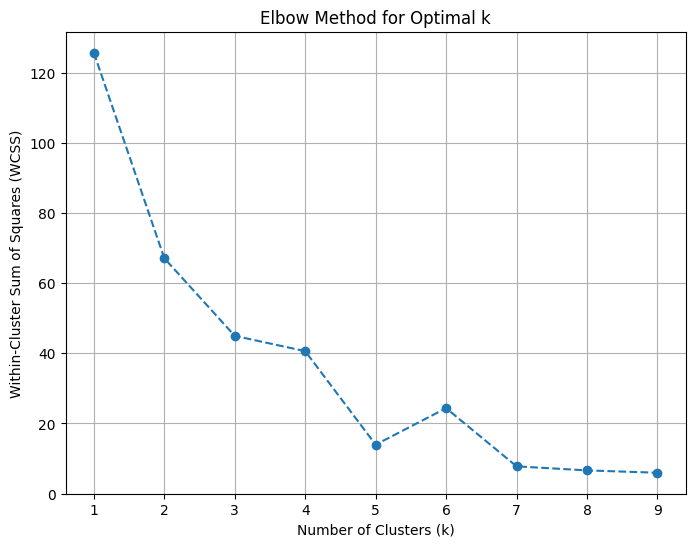

Iteration 1:
Centroids after iteration 1: [[ 5.77857143  2.35      ]
 [ 2.5         0.8       ]
 [ 5.275      -0.225     ]]
Iteration 2:
Centroids after iteration 2: [[ 5.66363636  2.63636364]
 [ 2.5         1.475     ]
 [ 5.83       -0.14      ]]
Iteration 3:
Centroids after iteration 3: [[ 5.48        2.82      ]
 [ 2.5         1.475     ]
 [ 5.98181818 -0.05454545]]
Iteration 4:
Centroids after iteration 4: [[ 5.48        2.82      ]
 [ 2.5         1.475     ]
 [ 5.98181818 -0.05454545]]
Convergence reached.


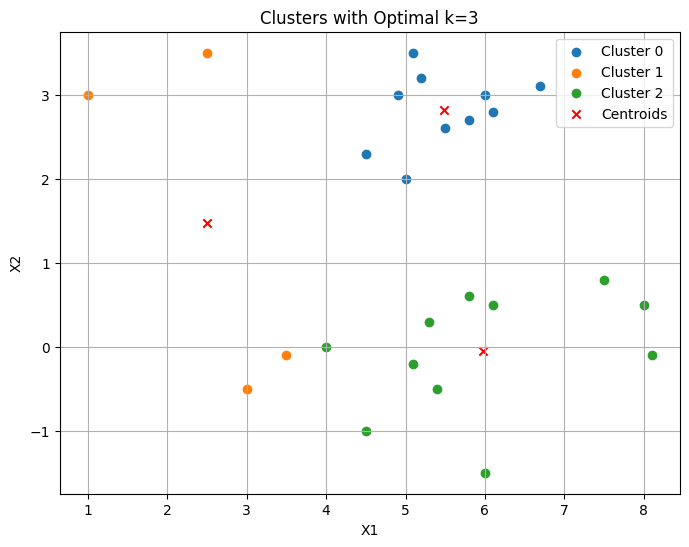

In [8]:
# Function to calculate WCSS
def calculate_wcss(X, cluster_labels, centroids):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = X[cluster_labels == i]
        wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

# Perform clustering for different values of k and calculate WCSS
wcss_values = []
k_values = range(1, 10)

for k in k_values:
    random_centroids = random_initialize_centroids(X, k)
    cluster_labels, final_centroids = kmeans(X, random_centroids)
    wcss = calculate_wcss(X, cluster_labels, final_centroids)
    wcss_values.append(wcss)

# Plot WCSS against k
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Perform clustering with the optimal k (elbow point) and plot the resulting clusters
optimal_k = 3  # Assume the elbow point is at k=3 based on the plot

# Run KMeans for the optimal k
optimal_centroids = random_initialize_centroids(X, optimal_k)
optimal_cluster_labels, optimal_final_centroids = kmeans(X, optimal_centroids)

# Separate points by their clusters
optimal_clusters = [X[optimal_cluster_labels == i] for i in range(optimal_k)]

# Plot the clusters
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(optimal_clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i}')
plt.scatter(optimal_final_centroids[:, 0], optimal_final_centroids[:, 1], color='red', label='Centroids', marker='x')
plt.title(f'Clusters with Optimal k={optimal_k}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()